In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import xarray as xr

In [2]:
path = '../JUL2020.aijWISO_20th_E2.1.ERA5_ANL.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 29MB
Dimensions:                             (lon: 144, lat: 90, shnhgm: 3)
Coordinates:
  * lon                                 (lon) float32 576B -178.8 ... 178.8
  * lat                                 (lat) float32 360B -90.0 -87.0 ... 90.0
Dimensions without coordinates: shnhgm
Data variables: (12/1121)
    axyp                                (lat, lon) float32 52kB ...
    ocnfr                               (lat, lon) float32 52kB ...
    ocnfr_hemis                         (shnhgm) float32 12B ...
    landfr                              (lat, lon) float32 52kB ...
    landfr_hemis                        (shnhgm) float32 12B ...
    oicefr                              (lat, lon) float32 52kB ...
    ...                                  ...
    L-O_TI                              (lat, lon) float32 52kB ...
    L-O_TI_hemis                        (shnhgm) float32 12B ...
    Tatm                                (lat, lon) float32 52kB ...
    Tatm_hemis                          (shnhgm) float32 12B ...
    TMINC                               (lat, lon) float32 52kB ...
    TMINC_hemis                         (shnhgm) float32 12B ...
Attributes:
    xlabel:   WISO_20th_ERA5_ANL (prescribed ocean atmospheric tracer model w...
    fromto:   From:  2020  JUL  1,  Hr  0      To:  2020  AUG  1, Hr  0  Mode...

# Cartopy

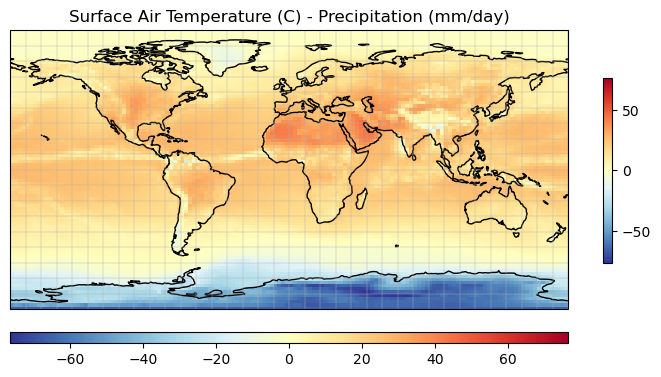

In [33]:
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(9,6)) #tsurf, prec
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linewidth=0.3, edgecolor='black')

gl = ax.gridlines(linewidth=0.3, edgecolor='black')
# Set the interval for longitude and latitude gridlines
gl.xlocator = mticker.FixedLocator(range(-180, 181, 10))  # Longitude every 10 degrees
gl.ylocator = mticker.FixedLocator(range(-90, 91, 10))    # Latitude every 10 degrees

cf = (ds['tsurf']-ds['prec']).plot(ax=ax, #transform=ccrs.Robinson(),
    # vmin=2, vmax=30, 
    cbar_kwargs={'shrink': 0.4}, cmap='RdYlBu_r',)
plt.title('Surface Air Temperature (C) - Precipitation (mm/day)')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)
fig

In [8]:
ds['tsurf'].min()

<xarray.DataArray 'tsurf' ()> Size: 8B
array(-76.42953491)

# XArray

https://docs.xarray.dev/en/stable/examples/area_weighted_temperature.html

In [5]:
hemi = ds.sel(lat=slice(0, 90))
prec_weighted = hemi['prec'].weighted(hemi['axyp'])
mean_prec_weighted = prec_weighted.mean()
mean_prec_weighted

<xarray.DataArray 'prec' ()> Size: 4B
np.float32(3.414454)